# Concetti fondamentali su immagini


In Python ci sono molte librerie che possono essere utilizzate per la manipolazione di immagini.

Le librerie di base che useremo sono `NumPy`, `SciPy` e `Matplotlib`.  
- `matplotlib verrà principalmente utilizzata per mostrare le immagini. 
- `NumPy` servirà per analizzare come le immagini vengono rappresentate
- Infine, `SciPy` servirà per fare operazioni di manipolazione "complesse".  

Altre librerie avanzate che vedremo in seguito sono    `PIL` (Pillow), `OpenCV` e `scikit-learn`. 

In [49]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import image as mp_image
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm
from scipy.ndimage import affine_transform, zoom
from scipy import misc


# Necessario per mostrare le figure nei notebooks
%matplotlib inline


img_src = './data/'

Definiamo alcune funzioni di utilità che utilizzeremo nel corso del notebook

In [28]:
def img_show(image,**argv):
    plt.figure(figsize=(10,10))
    plt.imshow(image,**argv) # display the image
    plt.axis('off')
    plt.show()


def img_info(image):
    print(image.shape, image.dtype, type(image)) 

Cominciamo con vedere come possiamo leggere immagini base usando matplotlib. 

(375, 500, 3) float32 <class 'numpy.ndarray'>


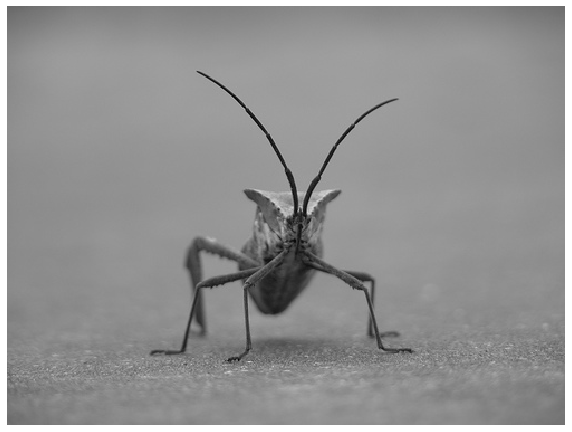

In [29]:
# legge l'immagine come un'array di pixel
image = mp_image.imread(os.path.join(img_src,'stinkbug.png'))
# un po' di sommari

img_info(image)

# visualizziamo l'immagine
img_show(image)

Vediamo com'è fatta l'immagine da vicino

In [30]:
print(image)

[[[0.40784314 0.40784314 0.40784314]
  [0.40784314 0.40784314 0.40784314]
  [0.40784314 0.40784314 0.40784314]
  ...
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]]

 [[0.4117647  0.4117647  0.4117647 ]
  [0.4117647  0.4117647  0.4117647 ]
  [0.4117647  0.4117647  0.4117647 ]
  ...
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]]

 [[0.41960785 0.41960785 0.41960785]
  [0.41568628 0.41568628 0.41568628]
  [0.41568628 0.41568628 0.41568628]
  ...
  [0.43137255 0.43137255 0.43137255]
  [0.43137255 0.43137255 0.43137255]
  [0.43137255 0.43137255 0.43137255]]

 ...

 [[0.4392157  0.4392157  0.4392157 ]
  [0.43529412 0.43529412 0.43529412]
  [0.43137255 0.43137255 0.43137255]
  ...
  [0.45490196 0.45490196 0.45490196]
  [0.4509804  0.4509804  0.4509804 ]
  [0.4509804  0.4509804  0.4509804 ]]

 [[0.44313726 0.44313726 0.44313726]
  [0.44313726 0.44313726 0.44313726]


L'immagine è in formato RGB  (tre canali: R, G e B). Notare che il tipo è `float32`: tutti i valori sono salati. 
Di fatto è possibile riportare il tutto a 24 bit trasformando l'immagine

(375, 500, 3) uint8 <class 'numpy.ndarray'>


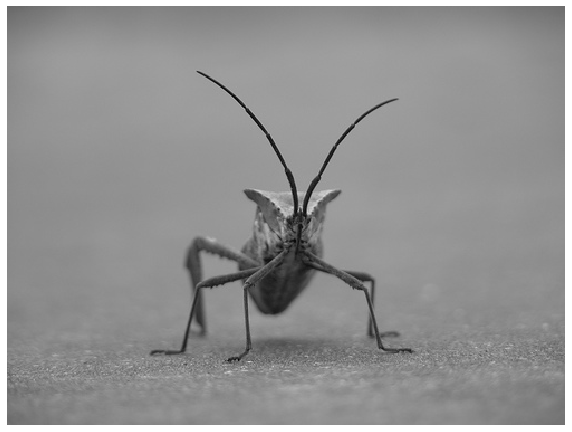

In [31]:
image1 = np.asarray(image*255,dtype="uint8")

img_info(image1)

img_show(image1) # display the image


Se esploriamo l'immagine vediamo questo

In [33]:
print(image1[0,0])

[104 104 104]


Cosa notate dell'immagine? E' in toni di grigio, poiché i tre colori sono identici. 
Quindi, se proviamo a visualizzare l'immagine usando un solo canale dovremmo ottenere la stessa rappresentazione

(375, 500) uint8 <class 'numpy.ndarray'>


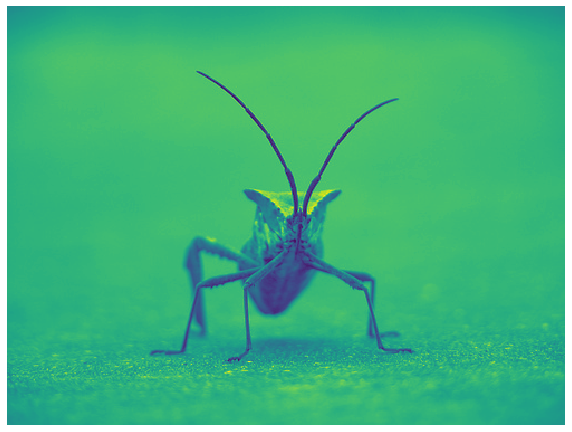

In [34]:
img_grey = image1[:,:,0]

img_info(img_grey) 


img_show(img_grey) # display the image


cos'è successo? Perché viene visualizzata in questo modo? 
Le matrici bidimensionali vengono interpretate in `Matplotlib` come a mappa di colori. La visualizzazione che abbiamo appena visto utilizza una mappa di default. 

Vediamo altre possibili mappe (una lista completa è disponibile [qui](https://matplotlib.org/tutorials/colors/colormaps.html) 


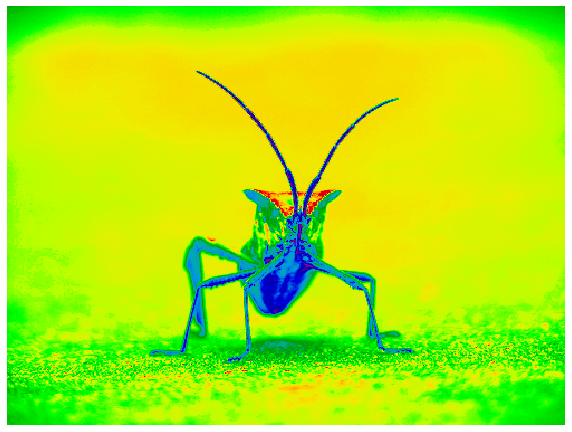

In [35]:
img_show(img_grey, cmap="nipy_spectral")


Vediamo un po' più in dettaglio: 


In [54]:
cmap = cm.get_cmap('Spectral')



print(cmap)


In [57]:
print(cmap(range(12)))

[[0.61960784 0.00392157 0.25882353 1.        ]
 [0.81568627 0.22139037 0.30516934 1.        ]
 [0.93475936 0.39393939 0.27130125 1.        ]
 [0.98253119 0.61283422 0.3483066  1.        ]
 [0.99465241 0.80713012 0.48520499 1.        ]
 [0.99821747 0.94474153 0.65632799 1.        ]
 [0.95543672 0.98217469 0.67950089 1.        ]
 [0.81782531 0.92655971 0.61319073 1.        ]
 [0.59679144 0.83778966 0.64420677 1.        ]
 [0.36292335 0.71942959 0.66417112 1.        ]
 [0.21176471 0.51301248 0.7315508  1.        ]
 [0.36862745 0.30980392 0.63529412 1.        ]]


In [55]:

rgba = cmap(100)

print(rgba)



(0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)


`rgba` rappresenta il valore della tavolozza corrispondente all'indice 100. è in formato RGB$\alpha$, ovvero un formato che oltre ai valori dei canali ha un valore aggiuntivo per la luminosità.  


Proviamo ora a plottare l'immagine con la paletta corretta, corredandola anche di una legenda per i colori


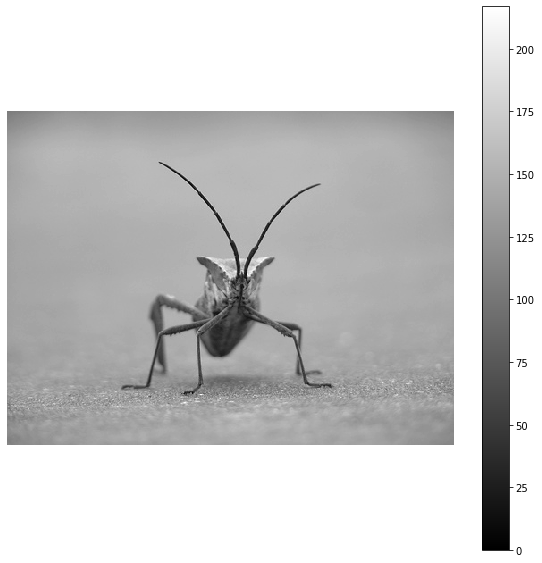

In [38]:
plt.figure(figsize=(10,10))
plt.imshow(img_grey, cmap="gray")
plt.colorbar()
plt.axis('off')
plt.show()


Proviamo a trasformare l'immagine in binaria. Trasformiamo in 0 tutti i valori al di sotto di una certa soglia, e in 1 quelli al di sopra. 

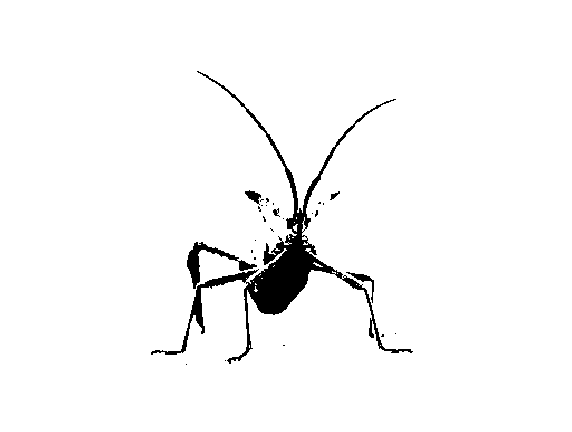

In [39]:
def binarize_image(image, threshold):
    return np.where(image <= threshold, 0, 255)


THRESHOLD = 80

img_bn = binarize_image(img_grey,THRESHOLD)


img_show(img_bn, cmap="gray")


È anche possibile ottenere la stessa rappresentazione in formato RGB, utilizzando tre canali: 

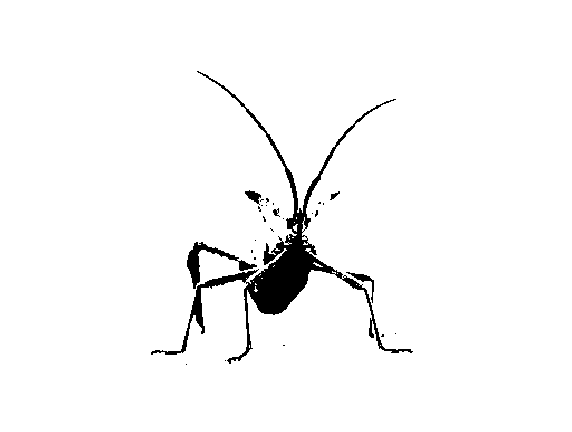

In [40]:
 img_bn_rgb= np.zeros((img_grey.shape[0],img_grey.shape[1],3))

# Where we set the RGB for each pixel
img_bn_rgb[img_grey>THRESHOLD] = [1,1,1]
img_bn_rgb[img_grey<THRESHOLD] = [0,0,0]

img_show(img_bn_rgb)


Vediamo adesso un po' più in dettaglio una immagine a colori. 

(1960, 1960, 3) uint8 <class 'numpy.ndarray'>


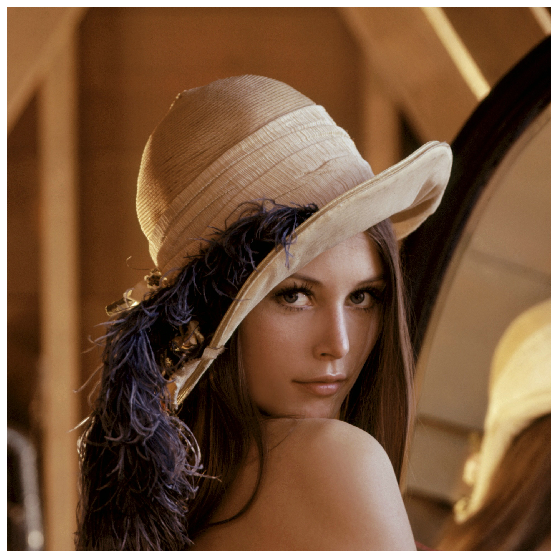

In [41]:

img = mp_image.imread(os.path.join(img_src,'lenna.jpg'))     
img_info(img) 

img_show(img)


Se andiamo ad analizzare il contenuto, osserviamo questo: 

In [42]:
print(img[0,0])

[156 104  57]


Possiamo normalizzare i valori e ottenere la stessa rappresentazione: 

(1960, 1960, 3) float64 <class 'numpy.ndarray'>


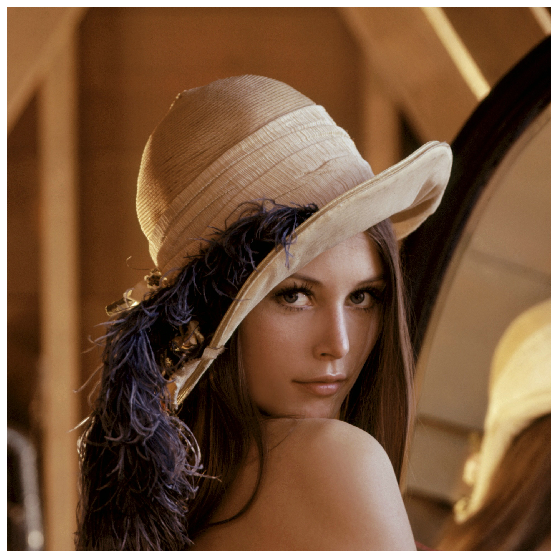

[0.61176471 0.40784314 0.22352941]


In [43]:
img_alt = (img/255.0).astype(float)
img_info(img_alt)

img_show(img_alt)


print(img_alt[0,0])

Trasformare un'immagine da RGB a scale di grigio è più complicato. Si tratta di mappare ogni colore a un valore di grigio. Ci sono vari modi per effettuare questa mappatura (su [wikpedia](https://en.wikipedia.org/wiki/Grayscale) ne sono indicati alcuni. Per esempio, se consideriamo l'associazione

$$
Y = 0.2989*R + 0.5870*G +  0.1140*B
$$

possiamo trasformare l'immagine in questo modo:

In [ ]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

gray = rgb2gray(img_alt)
img_info(gray)


img_show(gray, cmap='gray', vmin=0, vmax=1)

print(gray[0,0])

Vediamo come fare la conversione opposta: come possiamo passare da scale di grigio a colore?

Creando i canali aggiuntivi!

In [ ]:
dim = np.zeros((gray.shape[0],gray.shape[1]))

gray_to_rgb = np.stack((gray,dim,dim),axis=2)

img_info(gray_to_rgb)


img_show(gray_to_rgb, cmap='gray', vmin=0, vmax=1)

print(gray_to_rgb[0,0])

Abbiamo usato solo il canale `R`, ma in effetti possiamo fare varie combinazioni:

In [ ]:
fig = plt.figure(figsize=(20, 20))

fig.add_subplot(7, 3, 1) 
plt.imshow(np.stack((gray,dim,dim),axis=2))
plt.axis('off')

fig.add_subplot(7, 3, 2) 
plt.imshow(np.stack((dim,gray,dim),axis=2))
plt.axis('off')

fig.add_subplot(7, 3, 3) 
plt.imshow(np.stack((dim,dim,gray),axis=2))
plt.axis('off')

fig.add_subplot(7, 3, 4) 
plt.imshow(np.stack((gray,gray,dim),axis=2))
plt.axis('off')

fig.add_subplot(7, 3, 5) 
plt.imshow(np.stack((gray,dim,gray),axis=2))
plt.axis('off')

fig.add_subplot(7, 3, 6) 
plt.imshow(np.stack((dim,gray,gray),axis=2))
plt.axis('off')

fig.add_subplot(7, 3, 7) 
plt.imshow(np.stack((gray,gray,gray),axis=2))
plt.axis('off')

plt.show()


(1960, 1960) float64 <class 'numpy.ndarray'>


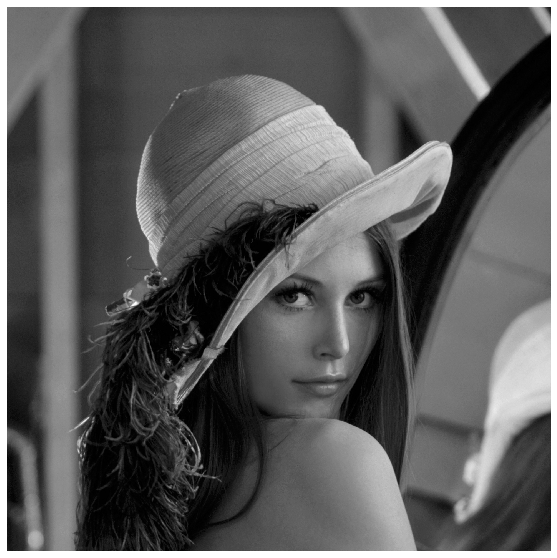

0.4477427450980392


Vediamo come fare la conversione opposta: come possiamo passare da scale di grigio a colore?

Creando i canali aggiuntivi!

(1960, 1960, 3) float64 <class 'numpy.ndarray'>


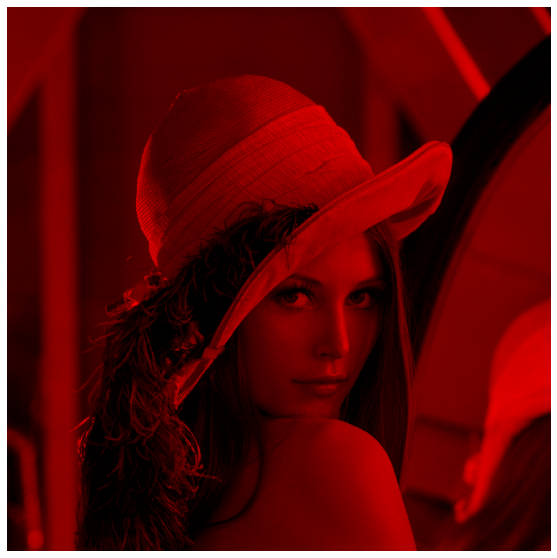

[0.44774275 0.         0.        ]


In [61]:
dim = np.zeros((gray.shape[0],gray.shape[1]))

gray_to_rgb = np.stack((gray,dim,dim),axis=2)

img_info(gray_to_rgb)


img_show(gray_to_rgb, cmap='gray', vmin=0, vmax=1)

print(gray_to_rgb[0,0])

Abbiamo usato solo il canale `R`, ma in effetti possiamo fare varie combinazioni:

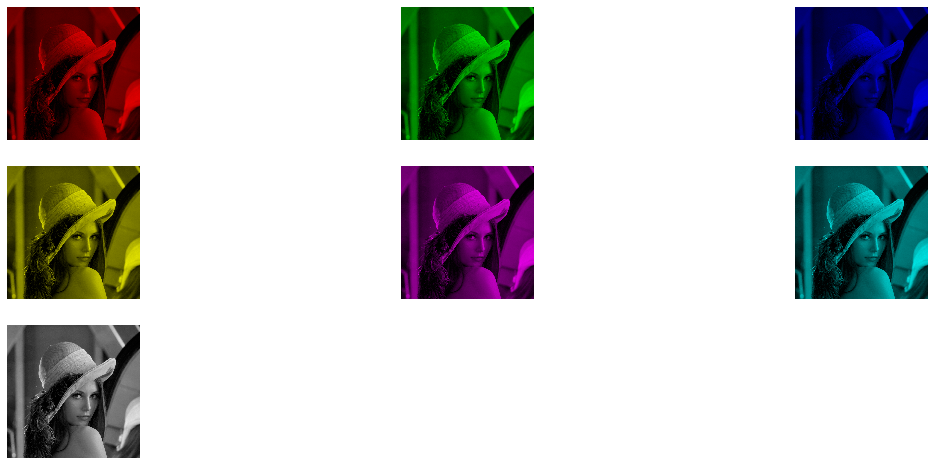

In [71]:
fig = plt.figure(figsize=(20, 20))

fig.add_subplot(7, 3, 1) 
plt.imshow(np.stack((gray,dim,dim),axis=2))
plt.axis('off')

fig.add_subplot(7, 3, 2) 
plt.imshow(np.stack((dim,gray,dim),axis=2))
plt.axis('off')

fig.add_subplot(7, 3, 3) 
plt.imshow(np.stack((dim,dim,gray),axis=2))
plt.axis('off')

fig.add_subplot(7, 3, 4) 
plt.imshow(np.stack((gray,gray,dim),axis=2))
plt.axis('off')

fig.add_subplot(7, 3, 5) 
plt.imshow(np.stack((gray,dim,gray),axis=2))
plt.axis('off')

fig.add_subplot(7, 3, 6) 
plt.imshow(np.stack((dim,gray,gray),axis=2))
plt.axis('off')

fig.add_subplot(7, 3, 7) 
plt.imshow(np.stack((gray,gray,gray),axis=2))
plt.axis('off')

plt.show()
